In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 初期スピン配位の生成
def initial_config(size_lat):
    return 2*(np.random.randint(0,2,size=(size_lat, size_lat))-1/2)

# Isingモデルのハミルトニアン（交換相互作用と外場）
def hamiltonian_ising(arr_spin, coupling, ex_field):
    n0, n1 = np.shape(arr_spin)
    hamiltonian = 0.0
    for i in range(-1,n0-1):
        for j in range(-1,n1-1):
            hamiltonian += -coupling*(arr_spin[i][j]*arr_spin[i][j+1] + arr_spin[i][j]*arr_spin[i+1][j])
    hamiltonian += -ex_field*np.sum(arr_spin)
    return hamiltonian

# メトロポリス法にしたがってスピン配位を更新する
def update_config(arr_spin, temp, coupling, ex_field):
    n0, n1 = np.shape(arr_spin)
    energy = hamiltonian_ising(arr_spin, coupling, ex_field)
    for i in range(0,n0):
        for j in range(0,n1):
            diff_energy = diff_flip(arr_spin, n0, n1, i, j, coupling, ex_field)
            if diff_energy < 0:
                energy += diff_energy
            elif np.random.rand() < np.exp(-diff_energy/temp):
                energy += diff_energy
            else:
                arr_spin[i][j] = -arr_spin[i][j] #スピンフリップの副作用の処理
    return arr_spin

# スピンをフリップした際のハミルトニアンの差分を出力（スピンフリップの副作用あり）
def diff_flip(arr_spin, n0, n1, i, j, coupling, ex_field):
    arr_spin[i][j] = -arr_spin[i][j]
    fliped = 0.0
    fliped += -coupling*(arr_spin[i][j]*arr_spin[i-1][j] + arr_spin[i][j]*arr_spin[-n0+i+1][j] 
                         + arr_spin[i][j]*arr_spin[i][j-1] + arr_spin[i][j]*arr_spin[i][-n1+j+1]) \
              -ex_field*arr_spin[i][j]
    return 2*fliped

# def energy_plot(size_lat, temp_min, temp_max, coupling, ex_field):
#     num_update = 200
#     num_step = 40
#     energy_lst =[]
#     temp_lst = np.linspace(temp_min, temp_max, num_step)
    
#     for temp_tmp in temp_lst:
#         arr_spin=initial_config(size_lat)
#         for i in range(0, num_update):
#             update_config(arr_spin, temp_tmp, coupling, ex_field)        
#         energy_lst.append(hamiltonian_ising(arr_spin, coupling, ex_field)/len(arr_spin)**2)
    
#     plt.plot(temp_lst, energy_lst)
#     plt.ylabel("energy per cite")
#     plt.xlabel("T")
#     plt.show()
    
# 温度に対する1サイト当たりの磁化の計算とその温度-磁化グラフのプロット
# T_c = 2/log(sqrt(2)+1) ~ 2.27
def magnetization_plot(size_lat, temp_min, temp_max, coupling, ex_field):
    num_update = 400
    num_update_sub = 400
    sampling_interval = 10
    num_step = 100
    mag_lst =[]
    mag_samples = []
    temp_lst = np.linspace(temp_min, temp_max, num_step)
    
    arr_spin=initial_config(size_lat)
    
    for temp_tmp in temp_lst:
        mag_samples = []

        for i in range(0, num_update):
            update_config(arr_spin, temp_tmp, coupling, ex_field)

        for i in range(0, num_update_sub):
            update_config(arr_spin, temp_tmp, coupling, ex_field)
            if (i+1)%sampling_interval==0:
                mag_samples.append(np.sum(arr_spin)/len(arr_spin)**2)

        mag_lst.append(np.sum(mag_samples)/len(mag_samples))
    
    plt.plot(temp_lst, mag_lst)
    plt.ylabel("magnetization per cite")
    plt.xlabel("T")
    plt.show()

In [3]:
[[j * (-1)**np.random.randint(0,2) for j in i]  for i in np.ones((10,10))]
(np.random.randint(0,2,size=(100,100))-1/2)*2

array([[ 1.,  1.,  1., ...,  1.,  1., -1.],
       [ 1.,  1.,  1., ...,  1.,  1., -1.],
       [-1., -1.,  1., ...,  1., -1., -1.],
       ...,
       [ 1., -1.,  1., ...,  1., -1.,  1.],
       [-1.,  1., -1., ...,  1.,  1.,  1.],
       [ 1., -1., -1., ...,  1., -1., -1.]])

76.0
0.0068


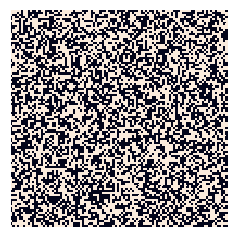

In [3]:
a=initial_config(100)
print(hamiltonian_ising(a, 1, 0.0))
print(np.sum(a)/len(a)**2)

plt.figure()
sns.heatmap(a, cbar=False, square=True, xticklabels=False, yticklabels=False)

-0.798
-0.8114
-0.8432
-0.8552
-0.8732
-0.9152
-0.9026
-0.9034
-0.9074
-0.9146
CPU times: user 21 s, sys: 16 ms, total: 21 s
Wall time: 21 s


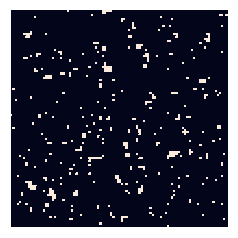

In [5]:
%%time
for i in range(0,100):
    update_config(a, 2.0, 1, 0.0)
    if i%10==0 :
        print(np.sum(a)/len(a)**2)
        
plt.figure()
sns.heatmap(a, cbar=False, vmax=1, vmin=-1, square=True, xticklabels=False, yticklabels=False)

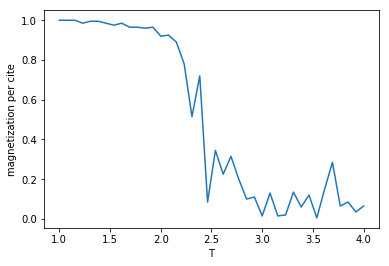

In [39]:
magnetization_plot(20, 1.0, 4.0, 1.0, 0.0)

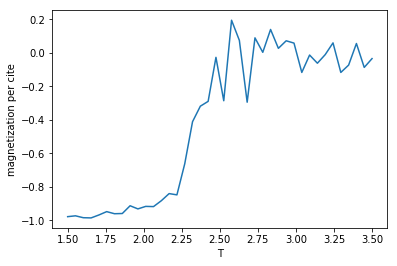

In [54]:
magnetization_plot(40, 1.5, 3.5, 1.0, 0.0)

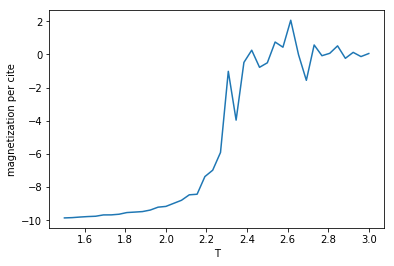

In [63]:
magnetization_plot(30, 1.5, 3.0, 1.0, 0.0)

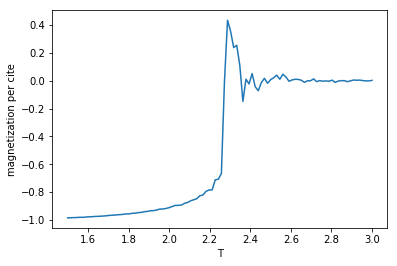

CPU times: user 4h 18min 1s, sys: 1.27 s, total: 4h 18min 2s
Wall time: 4h 18min 4s


In [87]:
%%time
magnetization_plot(100, 1.5, 3.0, 1.0, 0.0)

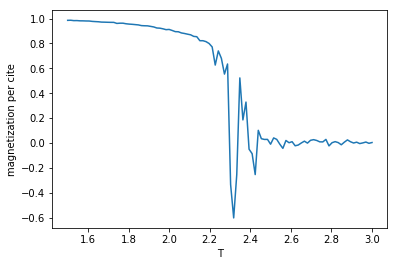

CPU times: user 1h 6min 30s, sys: 712 ms, total: 1h 6min 30s
Wall time: 1h 6min 31s


In [84]:
%%time
magnetization_plot(50, 1.5, 3.0, 1.0, 0.0)